In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors

df = pd.read_csv('data/bgg_dataset.csv', sep=';')
COLUMN_MAPPING = {
    "ID": "id",
    "Name": "name",
    "Year Published": "year_published",
    "Min Players": "min_players",
    "Max Players": "max_players",
    "Play Time": "play_time",
    "Min Age": "min_age",
    "Users Rated": "users_rated",
    "Rating Average": "rating_average",
    "BGG Rank": "bgg_rank",
    "Complexity Average": "complexity_average",
    "Owned Users": "owned_users",
    "Mechanics": "mechanics",
    "Domains": "domains"
}
    
# Clean data
# Rename Columns to reflect python naming
df = df.rename(columns=COLUMN_MAPPING)
# Adjust European numbering (with commas) with US decimal numbers
df['rating_average'] = df['rating_average'].str.replace(',','.').astype(float)
df['complexity_average'] = df['complexity_average'].str.replace(',','.').astype(float)

# Replace n/a with the string 'missing'
df.fillna({'domains':'missing'}, inplace=True)
df.fillna({'mechanics':'missing'}, inplace=True)
df.fillna({'owned_users':'none'}, inplace = True)

# Create new column that is a list of mechanics
df["mechanics_list"]=df["mechanics"].str.split(',')
# If no mechanics are provided, instead put an empty list here
df["mechanics_list"] = df["mechanics_list"].apply(lambda x: [] if x == ["missing"] else x)

# Clean up 'none' values in the owned_users column and then convert to integer
df["owned_users"] = df["owned_users"].apply(lambda x: 0 if x == 'none' else x)
df["owned_users"] = df["owned_users"].astype(int)
# df.drop(columns=["id"], inplace=True)

# Drop all rows with id column = n/a and convert to int
df.dropna(subset=['id'], inplace=True)
df["id"]=df["id"].astype(int)

# Years should be integers - not floats
df["year_published"]=df["year_published"].fillna(1900).astype(int)

df.to_csv('silver.csv')
df.head()


,id,name,year_published,min_players,max_players,play_time,min_age,users_rated,rating_average,bgg_rank,complexity_average,owned_users,mechanics,domains,mechanics_list
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games","[Action Queue, Action Retrieval, Campaign / ..."
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games","[Action Points, Cooperative Game, Hand Manag..."
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games,"[Hand Management, Income, Loans, Market, N..."
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games,"[Card Drafting, Drafting, End Game Bonuses, ..."
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games","[Action Drafting, Area Majority / Influence, ..."


In [33]:
temp_df = df[["id","name"]]
temp_df.head()
temp_df.to_csv("data/ids")

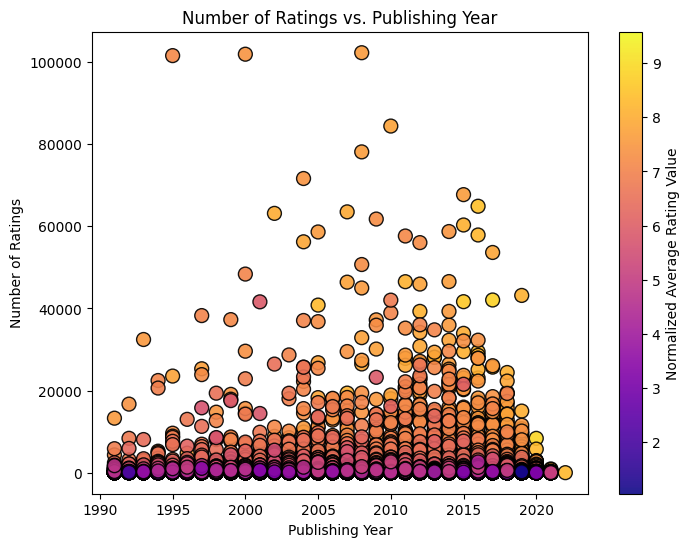

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors

norm = colors.Normalize(
    vmin=df['rating_average'].min(),
    vmax=df['rating_average'].max()
)

modern_df = df.loc[df["year_published"] > 1990]

plt.figure(figsize=(8, 6))  # Size of the figure

scatter = plt.scatter(
    x=modern_df['year_published'],                 # X-axis values
    y=modern_df['users_rated'],                 # Y-axis values
    c=modern_df['rating_average'],            # Raw values to be mapped to colors
    cmap='plasma',                  # Colormap used
    norm=norm,                      # Normalize function for color mapping
    s=100,                          # Marker size
    edgecolor='black',              # Optional: outlines around markers
    alpha=0.9                       # Transparency (0 = transparent, 1 = solid)
)
plt.xlabel('Publishing Year')
plt.ylabel('Number of Ratings')
plt.title("Number of Ratings vs. Publishing Year")

cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Average Rating Value')
# Show plot
plt.show()

# Observation - the number of ratings data peaks around 2015.  Very popular games exist across all time ranges.


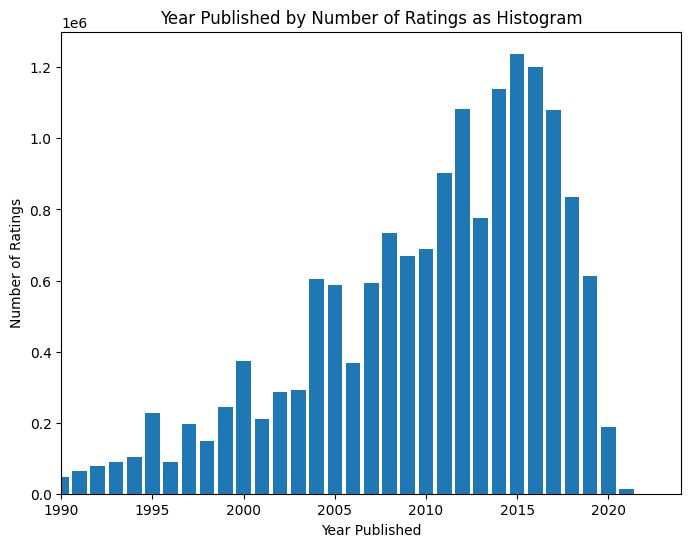

In [5]:
# Histogram - need to know the total number of ratings for a given year
ratings_by_year = df.groupby('year_published')['users_rated'].sum()
ratings_by_year.head()
plt.figure(figsize=(8, 6))  # Size of the figure

bar = plt.bar(ratings_by_year.index, ratings_by_year.values)
plt.xlabel("Year Published")
plt.ylabel("Number of Ratings")
plt.xlim(1990,2024)
plt.title("Year Published by Number of Ratings as Histogram")
plt.show()


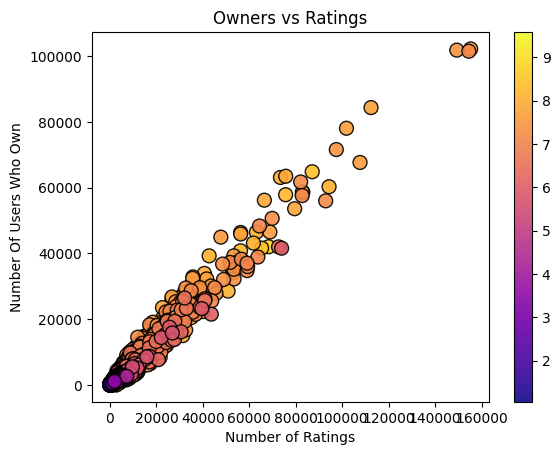

In [6]:
# Owned vs. Rated 
scatter = scatter = plt.scatter(
    x=modern_df['owned_users'],                 # X-axis values
    y=modern_df['users_rated'],                 # Y-axis values
    c=modern_df['rating_average'],            # Raw values to be mapped to colors
    cmap='plasma',                  # Colormap used
    norm=norm,                      # Normalize function for color mapping
    s=100,                          # Marker size
    edgecolor='black',              # Optional: outlines around markers
    alpha=0.9                       # Transparency (0 = transparent, 1 = solid)
)
plt.xlabel("Number of Ratings")
plt.ylabel("Number Of Users Who Own")
plt.title("Owners vs Ratings")
plt.colorbar(scatter)
plt.show()

    

In [35]:
len(df)

20327

In [37]:
(20327 *2)/60/60

11.29277777777778